In [1]:
import torch
import torchvision
import numpy as np
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
train_set = datasets.CIFAR10(root='./data/CIFAR10',
                            train=True,
                            download=True,
                            transform=transform)

test_set = datasets.CIFAR10(root='./data/CIFAR10',
                           train=False,
                           download=True,
                           transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = DataLoader(train_set,
                         batch_size=batch_size,
                         shuffle=True,
                         num_workers=2)

test_loader = DataLoader(test_set,
                        batch_size=batch_size,
                        shuffle=False,
                        num_workers=2)

In [5]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

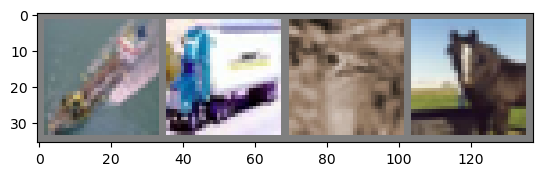

ship  truck bird  horse


In [6]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[i]]:5s}' for i in range(batch_size)))

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [8]:
model = CNN()

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.198
[1,  4000] loss: 1.920
[1,  6000] loss: 1.693
[1,  8000] loss: 1.562
[1, 10000] loss: 1.521
[1, 12000] loss: 1.486
[2,  2000] loss: 1.408
[2,  4000] loss: 1.391
[2,  6000] loss: 1.357
[2,  8000] loss: 1.328
[2, 10000] loss: 1.299
[2, 12000] loss: 1.290
Finished Training


In [11]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

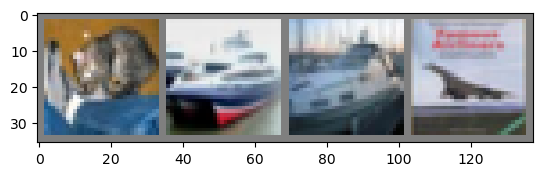

Ground Truth:  cat   ship  ship  plane


In [12]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join(f'{classes[labels[i]]:5s}' for i in range(4)))

In [13]:
model = CNN()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
outputs = model(images)

In [15]:
predicted = outputs.argmax(1)
print('Predicted: ', ' '.join(f'{classes[predicted[i]]:5s}' for i in range(4)))

Predicted:  cat   ship  plane plane


In [16]:
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        
        outputs = model(images)
        
        predicted = outputs.argmax(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [17]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        
        outputs = model(images)
        
        predictions = outputs.argmax(1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 67.9 %
Accuracy for class: car   is 63.9 %
Accuracy for class: bird  is 46.8 %
Accuracy for class: cat   is 41.7 %
Accuracy for class: deer  is 47.6 %
Accuracy for class: dog   is 41.2 %
Accuracy for class: frog  is 58.6 %
Accuracy for class: horse is 67.0 %
Accuracy for class: ship  is 65.3 %
Accuracy for class: truck is 58.0 %
